In [35]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import yfinance as yf
import pandas_datareader as pdr

In [36]:
data = pd.read_csv("sp500.csv", parse_dates=['Date'], index_col='Date')
data = data.loc['1980':]
data.columns

Index(['A', 'AAL', 'AAPL', 'ABBV', 'ABNB', 'ABT', 'ACGL', 'ACN', 'ADBE', 'ADI',
       ...
       'XEL', 'XOM', 'XRAY', 'XYL', 'YUM', 'ZBH', 'ZBRA', 'ZION', 'ZTS',
       '^GSPC'],
      dtype='object', length=504)

In [37]:
spy = data.iloc[:,-1:].pct_change()

# Defining Crisis Periods

In [38]:
peak_price = data['^GSPC'].iloc[0]
trough_price = peak_price
bear_market_start = None
bull_market_start = None
in_bear_market = False

for date, row in data.iterrows():
    current_price = row['^GSPC']
    
    if current_price > peak_price and not in_bear_market:
        peak_price = current_price
    
    decline = (peak_price - current_price) / peak_price
    rise = (current_price - trough_price) / trough_price if in_bear_market else 0
    
    if decline >= 0.20 and not in_bear_market:
        bear_market_start = date
        in_bear_market = True
        trough_price = current_price 
        print(f"Bear market started on {bear_market_start.date()} with a {decline*100:.2f}% decline from the peak.")
   
    if in_bear_market and current_price < trough_price:
        trough_price = current_price
    
    if rise >= 0.20 and in_bear_market:
        bull_market_start = date
        in_bear_market = False 
        print(f"Bull market started on {bull_market_start.date()}, ending the crisis that began on {bear_market_start.date()}.")


Bear market started on 1982-02-22 with a 20.59% decline from the peak.
Bull market started on 1982-09-14, ending the crisis that began on 1982-02-22.
Bear market started on 1987-10-19 with a 33.24% decline from the peak.
Bull market started on 1988-03-08, ending the crisis that began on 1987-10-19.
Bear market started on 1988-03-09 with a 20.11% decline from the peak.
Bull market started on 1989-04-14, ending the crisis that began on 1988-03-09.
Bear market started on 2001-03-12 with a 22.74% decline from the peak.
Bull market started on 2001-12-05, ending the crisis that began on 2001-03-12.
Bear market started on 2001-12-06 with a 23.59% decline from the peak.
Bull market started on 2002-08-22, ending the crisis that began on 2001-12-06.
Bear market started on 2002-08-23 with a 38.40% decline from the peak.
Bull market started on 2002-11-21, ending the crisis that began on 2002-08-23.
Bear market started on 2002-11-22 with a 39.08% decline from the peak.
Bull market started on 2003-0

# Correlation Plot (Tech Industry)

<Axes: >

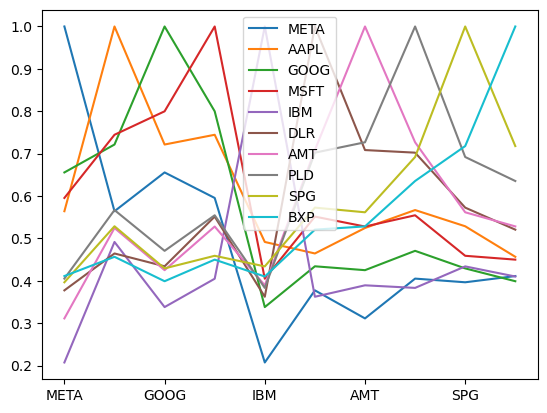

In [39]:
data[['META','AAPL','GOOG','MSFT','IBM','DLR','AMT','PLD','SPG','BXP']].loc['2022-06-13':'2023-06-08'].corr().plot()

THE STOCKS THAT ARE IN THE SAME SECTOR, CO-MOVE TOGETHER AND HAVE A SIMILAR CORRELATION WHEN A CRISIS OCCURS. THESE STOCKS MOVE SIMILARLY, WHICH MEANS THAT IF THEY ARE FALLING, THEY FALL BY APPROXIMATELY THE SAME PERCENTAGE. EACH SECTOR FOLLOWS THIS 

# Defining data without GSPC for calculating CORRELATION

In [40]:
data_wo_GSPC = data.drop('^GSPC', axis=1)

### Grouping Data (Monthly) - Correlations

In [65]:
monthly = data_wo_GSPC.groupby(pd.Grouper(freq='M')).corr()

In [42]:
monthly_corr_avg.median()

0.19753879677379918

In [43]:
mon_cor_med =  monthly.groupby(level=0).mean().median()

### Average Monthly Correlations

In [44]:
average_monthly_correlations = monthly.groupby(level=0).mean()

In [45]:
monthly_corr_avg = average_monthly_correlations.mean(axis=1)


# Monthly Correlation Plot

<Axes: xlabel='Date'>

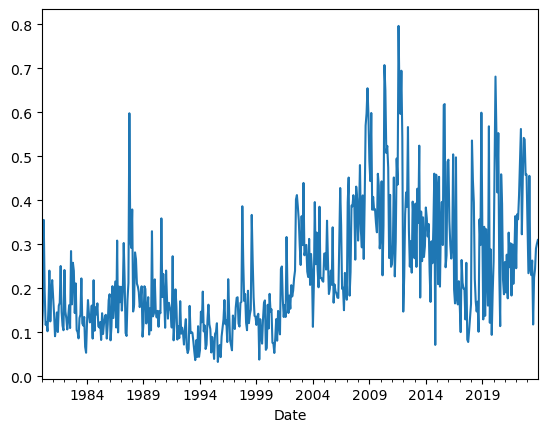

In [46]:
monthly_corr_avg.plot()

# Bear Market Start-End Dates

In [47]:
bear_market_start_to_end_dates = [
    ('1982-09-14', '1987-10-19'), ('1988-03-08', '1988-03-09'),
    ('1989-04-14', '2001-03-12'), ('2001-12-05', '2001-12-06'),
    ('2002-08-22', '2002-08-23'), ('2002-11-21', '2002-11-22'),
    ('2003-05-30', '2003-06-02'), ('2004-11-04', '2004-11-05'),
    ('2006-10-13', '2008-07-09'), ('2008-12-08', '2008-12-09'),
    ('2009-03-23', '2009-03-24'), ('2009-06-12', '2009-06-15'),
    ('2009-09-16', '2009-09-17'), ('2010-12-08', '2010-12-09'),
    ('2012-01-25', '2020-03-12'), ('2020-04-08', '2022-06-13'),
    ('2023-06-08', '2022-06-13')  
]

# Correlation with Bull-Bear Period PLOT (Monthly)

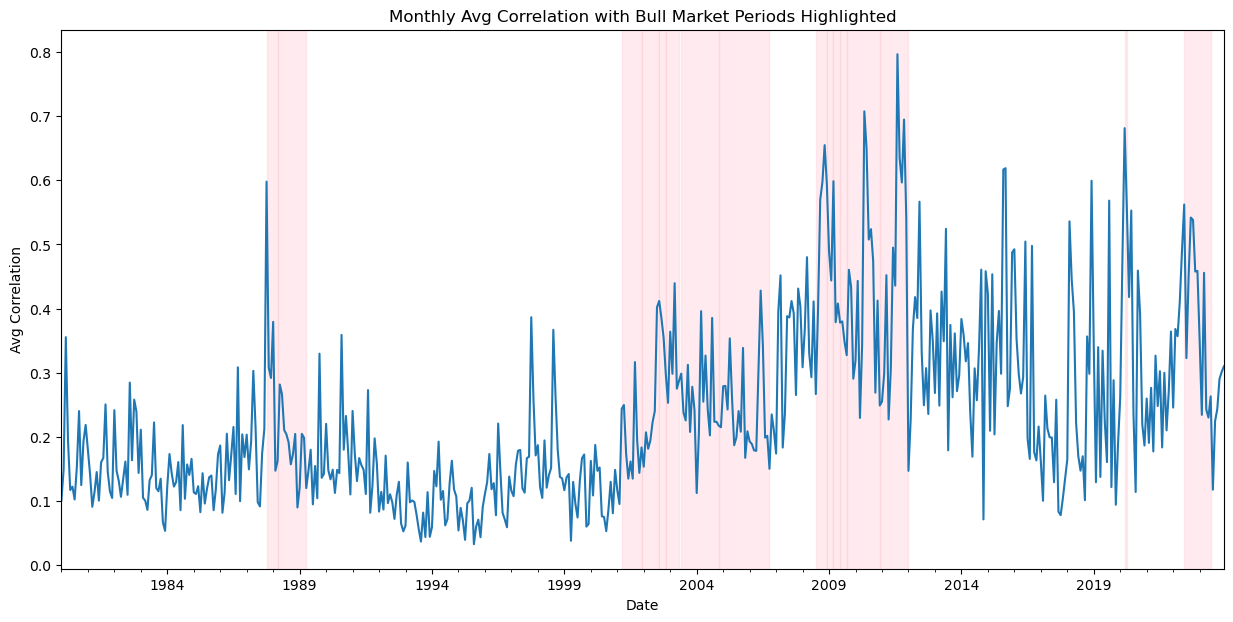

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

bear_dates = [(pd.to_datetime(start), pd.to_datetime(end)) for start, end in bear_market_start_to_end_dates]


bull_dates = []
for i in range(len(bear_dates) - 1):
    bull_start = bear_dates[i][1] + pd.Timedelta(days=1)
    bull_end = bear_dates[i+1][0] - pd.Timedelta(days=1)
    bull_dates.append((bull_start, bull_end))


fig, ax = plt.subplots(figsize=(15, 7))

monthly_corr_avg.plot(ax=ax)

for start, end in bull_dates:
    ax.axvspan(start, end, color='pink', alpha=0.3)

plt.title('Monthly Avg Correlation with Bull Market Periods Highlighted')
plt.xlabel('Date')
plt.ylabel('Avg Correlation')
plt.show()

This graph shows the monthy average correlations of the S&P 500 stocks with each other and the highlighted area shows the periods of bull market. We can see that the correlation during the highlighted period approaches 1, even though it might not exactly be 1, they still tend towrds 1 which does not exactly disprove the theory that correlations are 1 during crisis period.

### Grouping Data (Quarterly) - Correlations

In [49]:
quarterly = data_wo_GSPC.groupby(pd.Grouper(freq='Q')).corr()

In [50]:
quater_cor_med = quarterly.groupby(level=0).mean().median()

### Average Quarterly Correlations

In [51]:
average_quarterly_correlations = quarterly.groupby(level=0).mean()

In [52]:
quarterly_corr_avg = average_quarterly_correlations.mean(axis=1)


# Quarterly Correlation Plot

<Axes: xlabel='Date'>

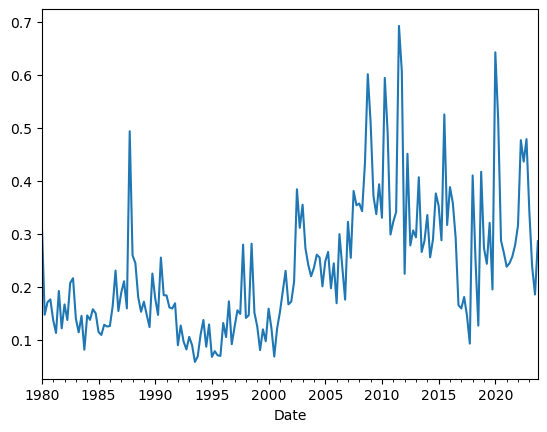

In [53]:
quarterly_corr_avg.plot()

# Correlation with Bull-Bear Period PLOT (Quarterly)

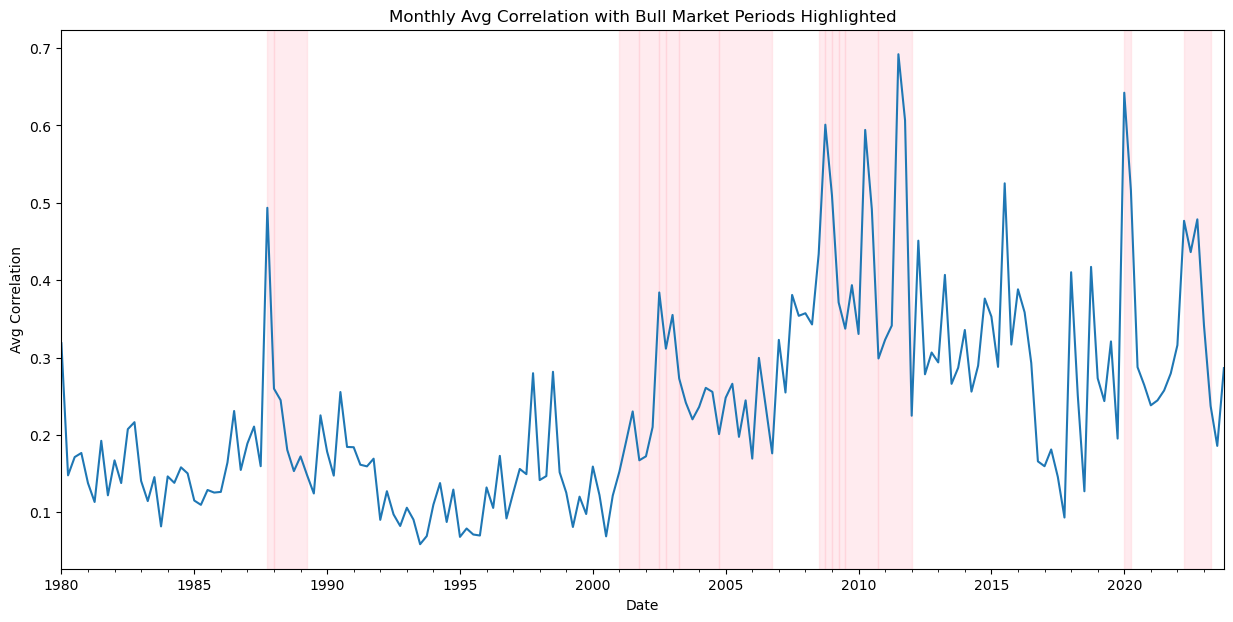

In [54]:

bear_dates = [(pd.to_datetime(start), pd.to_datetime(end)) for start, end in bear_market_start_to_end_dates]

bull_dates = []
for i in range(len(bear_dates) - 1):
    bull_start = bear_dates[i][1] + pd.Timedelta(days=1)
    bull_end = bear_dates[i+1][0] - pd.Timedelta(days=1)
    bull_dates.append((bull_start, bull_end))

fig, ax = plt.subplots(figsize=(15, 7))

quarterly_corr_avg.plot(ax=ax)

for start, end in bull_dates:
    ax.axvspan(start, end, color='pink', alpha=0.3)

plt.title('Monthly Avg Correlation with Bull Market Periods Highlighted')
plt.xlabel('Date')
plt.ylabel('Avg Correlation')
plt.show()


This pattern of the quarterly average correlations follows a similar pattern to the average monthly correlations where the correlations tend towrads 1 but they are not exactly 1.

# Calculating Monthly BETA

In [55]:
pdr.famafrench.get_available_datasets()[:5]

ff_all = pdr.DataReader(
    name='F-F_Research_Data_Factors_daily',
    data_source='famafrench',
    start='1980',
    end ='2024'
)

ff_all[0]

ff = ff_all[0].div(100)


risk_free = (ff_all[0].iloc[:,3:4]).dropna()
mrp = ff_all[0].iloc[:,0:1]


## Calculating Numerator and Denominator of Betas separately

In [56]:
beta_top = data_wo_GSPC.sub(ff['RF'],axis=0).join(ff['Mkt-RF']).groupby(pd.Grouper(freq='M')).cov().iloc[:,-1:]
beta_bottom = ff['Mkt-RF'].groupby(pd.Grouper(freq='M')).var()


In [57]:
beta = beta_top.div(beta_bottom,axis=0)


In [58]:
average_monthly_beta = beta.groupby(level=0).mean()


<Axes: xlabel='Date'>

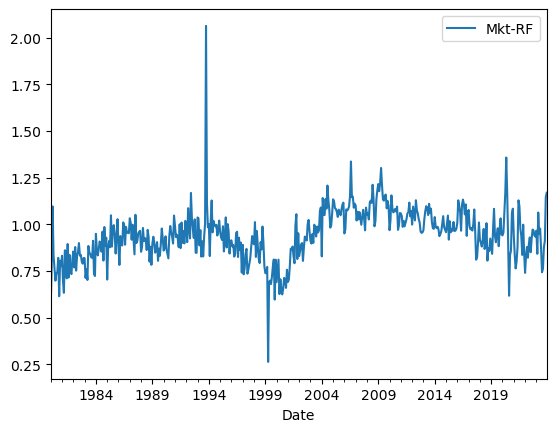

In [59]:
average_monthly_beta.plot()

This graphs shows the average monthly betas of stocks from 1980 to 2023. 

In [60]:
beta_top = data_wo_GSPC.sub(ff['RF'],axis=0).join(ff['Mkt-RF']).groupby(pd.Grouper(freq='Q')).cov().iloc[:,-1:]
beta_bottom = ff['Mkt-RF'].groupby(pd.Grouper(freq='Q')).var()
beta = beta_top.div(beta_bottom,axis=0)
average_quarterly_beta = beta.groupby(level=0).mean()


<Axes: xlabel='Date'>

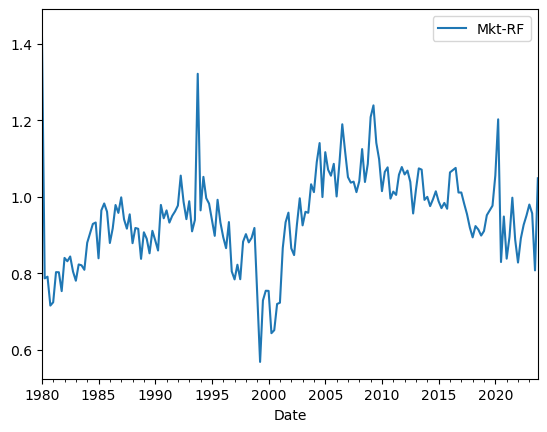

In [61]:
average_quarterly_beta.plot()

# Beta Plot highlighting Bull Period

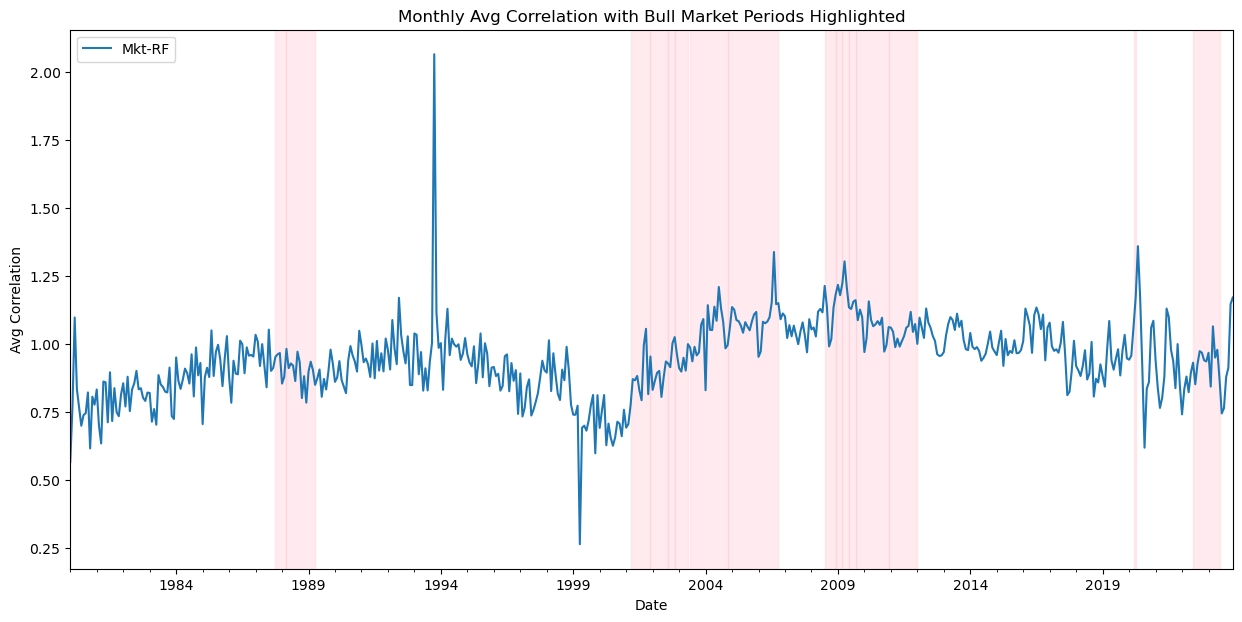

In [62]:

bear_dates = [(pd.to_datetime(start), pd.to_datetime(end)) for start, end in bear_market_start_to_end_dates]

bull_dates = []
for i in range(len(bear_dates) - 1):
    bull_start = bear_dates[i][1] + pd.Timedelta(days=1)
    bull_end = bear_dates[i+1][0] - pd.Timedelta(days=1)
    bull_dates.append((bull_start, bull_end))

fig, ax = plt.subplots(figsize=(15, 7))

average_monthly_beta.plot(ax=ax)

for start, end in bull_dates:
    ax.axvspan(start, end, color='pink', alpha=0.3)

plt.title('Monthly Avg Correlation with Bull Market Periods Highlighted')
plt.xlabel('Date')
plt.ylabel('Avg Correlation')
plt.show()

This graph shows the average monthly betas of stocks, the highlighted period shows the bull market period in the stock market. The period that is not highlighted marks the bear market period. The bear market period has witnessed an average monthly beta of around 2 which shows that the stocks fell twice as much as the index in the bear market, whereas during the bull market period the betas have remained relatively stable around the 1 mark. 

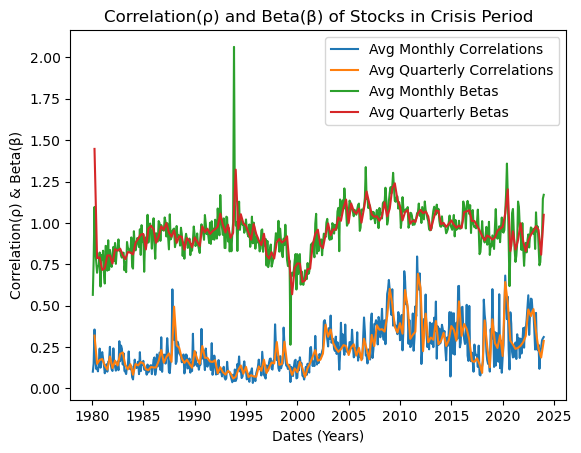

In [63]:

plt.plot(monthly_corr_avg, label='Avg Monthly Correlations')


plt.plot(quarterly_corr_avg, label='Avg Quarterly Correlations')


plt.plot(average_monthly_beta, label='Avg Monthly Betas')


plt.plot(average_quarterly_beta, label='Avg Quarterly Betas')




plt.xlabel('Dates (Years)')
plt.ylabel('Correlation(ρ) & Beta(β)')
plt.title('Correlation(⍴) and Beta(β) of Stocks in Crisis Period')


plt.legend()

plt.show()

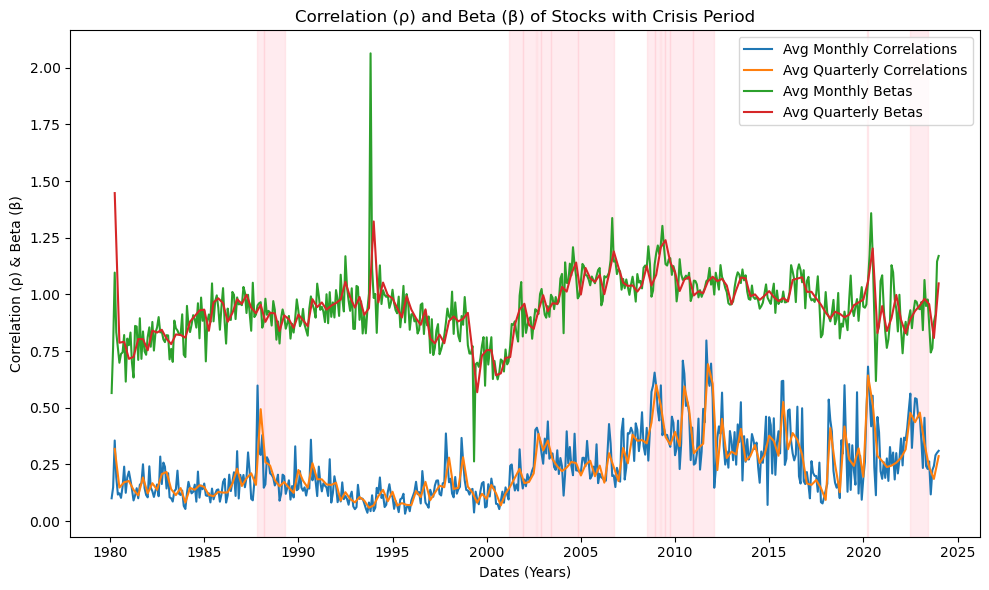

In [64]:
import matplotlib.pyplot as plt
import pandas as pd

bear_dates = [(pd.to_datetime(start), pd.to_datetime(end)) for start, end in bear_market_start_to_end_dates]

bull_dates = []
for i in range(len(bear_dates) - 1):
    bull_start = bear_dates[i][1] + pd.Timedelta(days=1)
    bull_end = bear_dates[i+1][0] - pd.Timedelta(days=1)
    bull_dates.append((bull_start, bull_end))

plt.figure(figsize=(10, 6))

plt.plot(monthly_corr_avg, label='Avg Monthly Correlations')

plt.plot(quarterly_corr_avg, label='Avg Quarterly Correlations')

plt.plot(average_monthly_beta, label='Avg Monthly Betas')

plt.plot(average_quarterly_beta, label='Avg Quarterly Betas')

for start, end in bull_dates:
    plt.axvspan(start, end, color='pink', alpha=0.3)

plt.xlabel('Dates (Years)')
plt.ylabel('Correlation (ρ) & Beta (β)')
plt.title('Correlation (⍴) and Beta (β) of Stocks with Crisis Period')

plt.legend()

plt.tight_layout()
plt.show()

This graph shows the monthly and quarterly average correlations and betas and the highlighted period shows the bull market period. The non highlighted period shows the bear market period. The correlations of monthly and quarterly periods during the bull market are moving towards 1 and then remaining lower than 0.5 during the bear market periods. The betas during bear market period in some cases move towards 2 which shows that the stocks during crises periods fell more than 2 times of the index. 